<a href="https://colab.research.google.com/github/mihirkumar28/SCOA/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self.fitness = 0
        self.calculate_fitness()
    
    def calculate_fitness(self):
        self.fitness = 0
        for i,gene in enumerate(self.genes):
            self.fitness += (i+1)*(gene**2)

In [3]:
class GeneticAlgorithm:
    def __init__(self):
        self.n_chromosomes = 0
        self.n_genes = 0
        self.population = []
        self.max_fitness = 0
        self.fitness_graph = []
        self.generate_population()
        self.calculate_max_fitness()
        
    def generate_population(self):
        self.n_chromosomes = int(input("Enter number of chromosomes: "))
        self.n_genes = int(input("Enter number of genes: "))
        print(f"Chromosomes: {self.n_chromosomes}\nGenes: {self.n_genes}")
        self.population = []
        for i in range(self.n_chromosomes): 
            genes = np.random.standard_normal(size=self.n_genes).tolist()
            self.population.append(Chromosome(genes))
    
    def calculate_max_fitness(self):
        self.max_fitness = 0
        for i in range(self.n_genes):
            self.max_fitness += (i+1)*100
        
    def selection(self):
        population_size = (self.n_chromosomes*2)//2
        selected_population = []
        while len(selected_population) != self.n_chromosomes:
            # Creating tournament
            tournament_size = population_size//2 if population_size//10 < 5 else size//10
            tournament_population = random.sample(self.population, tournament_size)
            # Appending winner in selected population to generate offsprings
            winner = max(tournament_population, key = lambda chromosome : chromosome.fitness)
            selected_population.append(winner)
        return selected_population

    def cross_over(self, selected_population):
        offsprings = []
        while len(offsprings) != self.n_chromosomes:
            # Randomly generating crossover point
            crossover_point = random.randint(0,self.n_genes-2)
            # Randomly selecting two parents
            parent_a, parent_b = random.sample(selected_population, 2)
            # Generating offsprings by swapping genes
            parent_a.genes[crossover_point:self.n_genes], parent_b.genes[crossover_point:self.n_genes] = parent_b.genes[crossover_point:self.n_genes], parent_a.genes[crossover_point:self.n_genes]
            offsprings += [parent_a, parent_b]
        return offsprings
            
    def mutation(self, offsprings):
        mutation_range = random.randint(1,len(offsprings)//3)
        random_offsprings = random.sample(range(0, len(offsprings)-1), mutation_range)
        for i in random_offsprings:
            index = random.randint(0,self.n_genes-1)
            offsprings[i].genes[index] = random.uniform(0, 10)
        return offsprings
        
    def replacement(self, offsprings):
        self.population = offsprings
        for i in range(self.n_chromosomes):
            self.population[i].calculate_fitness()
    
    def check_termination(self, i):
        best_chromosome = max(self.population, key = lambda chromosome : chromosome.fitness)
        print(f"\nBest chromosome after iteration {i}: {best_chromosome.genes} \nFitness: {best_chromosome.fitness}")
        self.fitness_graph.append(best_chromosome.fitness)
        if best_chromosome.fitness >= self.max_fitness:
            print("Termination criteria reached")
            return True
        return False
    
    def plot_graph(self):
        plt.plot(self.fitness_graph)
        plt.ylim(0, self.max_fitness)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Best Chromosome fitness")

Enter number of chromosomes: 10
Enter number of genes: 10
Chromosomes: 10
Genes: 10

Best chromosome after iteration 1: [-0.14848826160159037, 0.1605586277159571, -0.645162369936046, 0.4204411588440447, -1.5629264825410702, 3.66661824999313, 9.797477146930264, -0.3011014622703609, -0.46106702337517, -0.09489146403024037] 
Fitness: 769.5701206657342

Best chromosome after iteration 2: [-0.14848826160159037, 0.1605586277159571, 0.9300008180083541, 0.4204411588440447, -1.5629264825410702, 0.0962381952950997, 6.165385298814087, -0.3011014622703609, -0.46106702337517, -0.09489146403024037] 
Fitness: 284.45707824126885

Best chromosome after iteration 3: [-0.14848826160159037, 0.1605586277159571, 9.121113576228252, 0.4204411588440447, -1.5629264825410702, 0.0962381952950997, 6.165385298814087, -0.3011014622703609, -0.46106702337517, -0.09489146403024037] 
Fitness: 531.4465122881462

Best chromosome after iteration 4: [-0.14848826160159037, 0.1605586277159571, 9.121113576228252, 1.73951897943

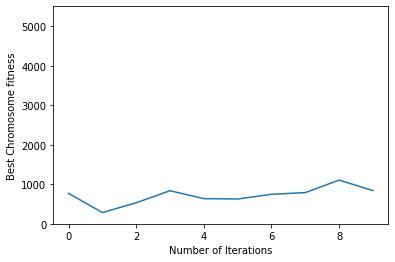

In [4]:
genetic_algorithm = GeneticAlgorithm()
for i in range(100):
  selected_population = genetic_algorithm.selection()
  offsprings = genetic_algorithm.cross_over(selected_population)
  offsprings = genetic_algorithm.mutation(offsprings)
  genetic_algorithm.replacement(offsprings)
  if genetic_algorithm.check_termination(i+1):
    break
genetic_algorithm.plot_graph()